## Project 1: FinTech Stock Portfolio vs. Crypto Portfolio - Dashboard ##

In this notebook, we've compiled the visualizations from the comparative analysis into functions that can be used for a Panel dashboard.

In [77]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas as hv
import matplotlib.pyplot as plt
import os;
from pathlib import Path;
import plotly.graph_objects as go;
from dotenv import load_dotenv;
!pip install alpaca_trade_api;
import alpaca_trade_api as tradeapi;
!pip install sanpy;
import sanpy as san

  Using cached sanpy-0.8.11-py3-none-any.whl (35 kB)
  Using cached iso8601-0.1.16-py2.py3-none-any.whl (10 kB)


ModuleNotFoundError: No module named 'sanpy'

In [72]:
load_dotenv()

True

# Import Data

In [73]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
 
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

- - -

## Individual Financial Stock Performance

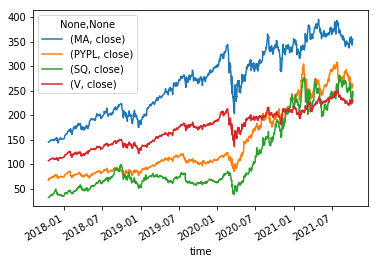

In [68]:
# Financial portfolio index: VISA, SQUARE, PAYPAL, MASTERCARD, AMEX

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()


# Set the tickers for Financial and Technology portfolio indexes
fin_tickers = ["V", "SQ", "PYPL", "MA"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
financial_investments = alpaca.get_barset(
    fin_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df


# Drop columns and keep close
financial_close = financial_investments.drop(financial_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19]], axis=1)
financial_close = financial_close.dropna()
fin_stock_chart = financial_close.plot()


## Individual FAANG Stock Performance

Combined all of the plots into a single dashboard view using Panel.

In [54]:
# Technology portfolio index: FACEBOOK, AMAZON, APPLE, NETFLIX, GOOGLE

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()

# Set the tickers for Financial and Technology portfolio indexes
faang_tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOGL"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
faang_investments = alpaca.get_barset(
    faang_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df

# Drop columns and keep close
faang_close = faang_investments.drop(faang_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 24]], axis=1)
faang_close = faang_close.dropna()
fang_chart = faang_close.head()

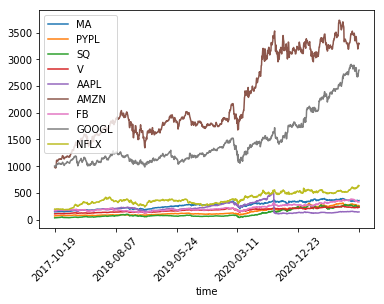

In [59]:
# Join the financial stock portfolio returns to the technology stock portfolio returns
fintech_portfolios = pd.concat([financial_close, faang_close], axis="columns", join="inner")
fintech_portfolios = fintech_portfolios.dropna().copy()

fintech_portfolios.columns = ["MA", "PYPL","SQ", "V", "AAPL", "AMZN", "FB", "GOOGL", "NFLX"]
fintech_portfolios.index = fintech_portfolios.index.strftime('%Y-%m-%d')
all_stock_chart = fintech_portfolios.plot(rot=45);

In [52]:
fin_change = fintech_portfolios.pct_change();
fin_change.plot(kind="pie");

ValueError: pie requires either y column or 'subplots=True'

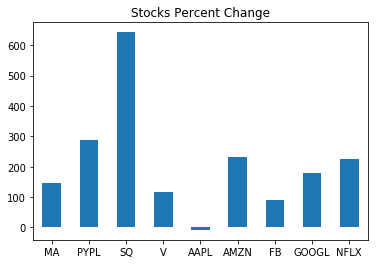

In [56]:
fin_start_end = fintech_portfolios.iloc[[0,-1]]
fin_change = fin_start_end.pct_change()
finx = fin_change.iloc[1]*100
pct_change_chart = finx.plot(kind="bar", title="Stocks Percent Change", rot="0");

In [76]:
#crypto time analysis 
# Fetch Crypto Data and Date Ranges

btc = san.get(
    "prices/bitcoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

eth = san.get(
    "prices/ethereum",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ltc = san.get(
    "prices/litecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ada = san.get(
    "prices/cardano",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

doge = san.get(
    "prices/dogecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

# Combine all crypto data into a single DataFrame

crypto_df = pd.concat([btc, eth, ltc, ada, doge], axis=1, join="inner")
crypto_close = crypto_df.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)
crypto_close.index = crypto_close.index.strftime('%Y-%m-%d')
crypto_close.head()

# Drop NAs
crypto_daily_returns = crypto_daily_returns.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)

# Rename Column Headers
crypto_daily_returns.columns=['BTC', 'ETH', 'LTC', 'ADA', 'DOGE']

crypto_daily_returns.index = crypto_daily_returns.index.strftime('%Y-%m-%d')

# Display sample data
crypto_daily_returns.plot()


AttributeError: module 'san' has no attribute 'get'

In [ ]:
#dashboard 

